# car_prediction evalution task1:

In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
#reading the csv file
df = pd.read_csv("C:\\Users\\USER\\Desktop\\ds\\cars_price.csv",index_col=0)

In [3]:
#displaying the first few records from csv files.
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [4]:
#df.info()

In [5]:
#checking out for the unique values in each columns
print(df['segment'].unique())
print(df['drive_unit'].unique())
print(df['transmission'].unique())
print(df['color'].unique())
print(df['fuel_type'].unique())
print(df['condition'].unique())
#print(df['make'].unique())
#print(df['model'].unique())

['D' 'M' 'A' 'J' 'C' 'E' nan 'F' 'B' 'S']
['front-wheel drive' 'all-wheel drive' 'part-time four-wheel drive'
 'rear drive' nan]
['mechanics' 'auto']
['black' 'silver' 'purple' 'blue' 'burgundy' 'green' 'gray' 'white'
 'other' 'red' 'brown' 'orange' 'yellow']
['petrol' 'diesel' 'electrocar']
['with mileage' 'with damage' 'for parts']


In [6]:
#creating the copy of exiting data frame
cars = df.copy()

In [7]:
#counts unique values
cars['drive_unit'].value_counts()

front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

In [8]:
#checking if there is any null values using .info() f
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 40000 non-null  object 
 1   model                40000 non-null  object 
 2   priceUSD             40000 non-null  int64  
 3   year                 40000 non-null  int64  
 4   condition            40000 non-null  object 
 5   mileage(kilometers)  40000 non-null  float64
 6   fuel_type            40000 non-null  object 
 7   volume(cm3)          39970 non-null  float64
 8   color                40000 non-null  object 
 9   transmission         40000 non-null  object 
 10  drive_unit           38655 non-null  object 
 11  segment              36245 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.0+ MB


In [9]:
#replace all the nan values with mean of that volume(cm3) excluding nan.
cars['volume(cm3)'] = cars['volume(cm3)'].fillna((cars['volume(cm3)'].mean()))

In [10]:
#data imputation, fill na with most frequently occured value
def impute_category(df,colname):
    most_frq_cat = df[colname].mode()[0]
    df[colname+"_imputed"]= df[colname]
    df[colname+"_imputed"].fillna(most_frq_cat,inplace=True)

In [11]:
for col in ['drive_unit','segment']:
    impute_category(cars,col)

In [12]:
#drop the columns which has null value
cars = cars.drop(['drive_unit','segment'],axis=1)

In [13]:
#conclusion using price and segment
results = cars.groupby('segment_imputed').sum()

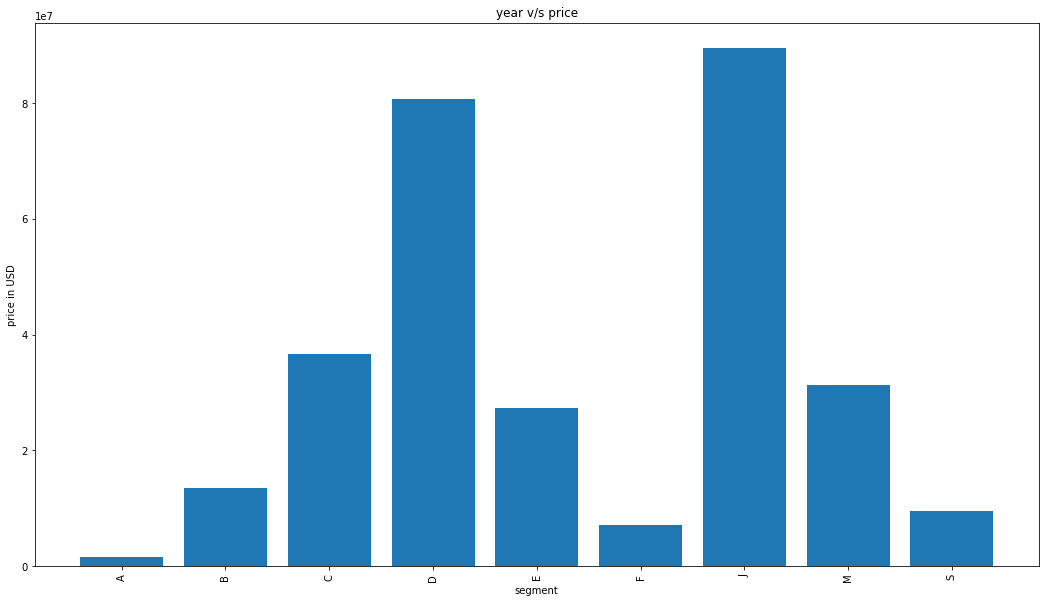

In [14]:
plt.figure(figsize=(18,10))
segments = [seg for seg,cars in cars.groupby('segment_imputed')]
plt.bar(x=segments,height=results['priceUSD'])
plt.xticks(segments,rotation='vertical')
plt.title("year v/s price")
plt.xlabel("segment")
plt.ylabel("price in USD")
plt.show()

In [15]:
#conclusion from the above graph is that, J is having the height sales price while segments are taken for analysis

In [16]:
# conclusion using year and price
result = cars.groupby('year').sum()

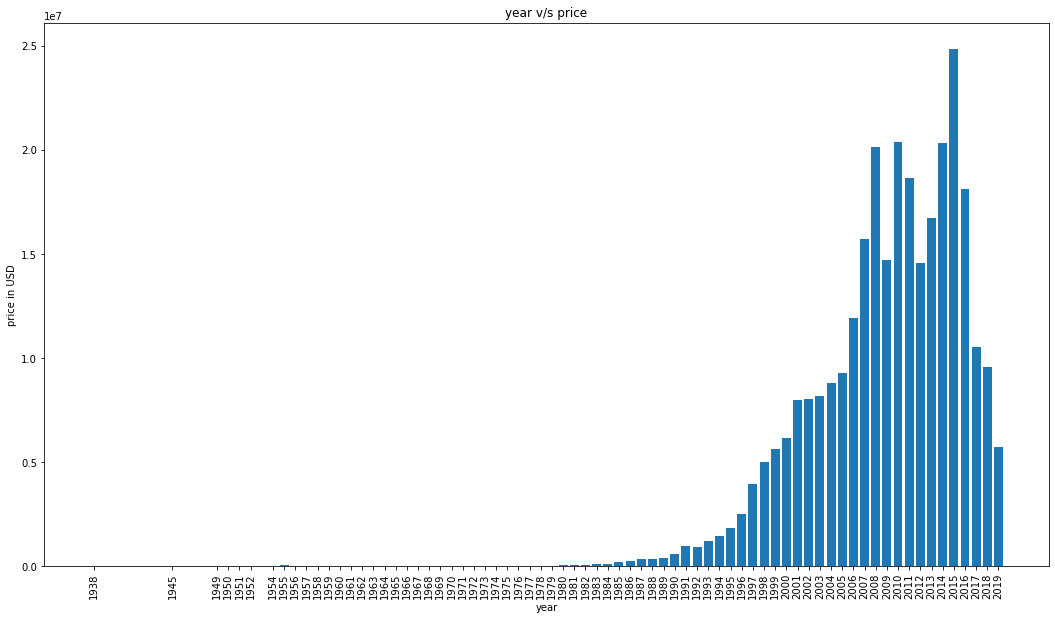

In [17]:
plt.figure(figsize=(18,10))
years = [year for year,cars in cars.groupby('year')]
plt.bar(x=years,height=result['priceUSD'])
plt.xticks(years,rotation='vertical')
plt.title("year v/s price")
plt.xlabel("year")
plt.ylabel("price in USD")
plt.show()

In [18]:
#2015 has the highest sales price while being grouped with years

In [19]:
#drop the columns since it will not play any significant role in predicting the car prices
cars.drop(['make','model','color','year'],axis=1,inplace=True)

In [20]:
cars.head()

,priceUSD,condition,mileage(kilometers),fuel_type,volume(cm3),transmission,drive_unit_imputed,segment_imputed
0,565,with mileage,960015.0,petrol,2000.0,mechanics,front-wheel drive,D
1,5550,with mileage,172000.0,diesel,1400.0,mechanics,front-wheel drive,M
2,8300,with mileage,223000.0,petrol,2500.0,auto,front-wheel drive,D
3,3300,with mileage,140000.0,petrol,1200.0,mechanics,front-wheel drive,A
4,2450,with damage,413000.0,diesel,2200.0,mechanics,front-wheel drive,D


In [21]:
#finding the statistical inferences such as mean,std,min,quartiles

In [22]:
cars.describe()

,priceUSD,mileage(kilometers),volume(cm3)
count,40000.000000,4.000000e+04,40000.000000
mean,7430.383775,2.434332e+05,2103.201676
std,8338.242134,3.167033e+05,938.372556
min,95.000000,0.000000e+00,500.000000
25%,2350.000000,1.370000e+05,1600.000000
50%,5350.000000,2.280000e+05,1996.000000
75%,9850.000000,3.087610e+05,2300.000000
max,195000.000000,9.999999e+06,20000.000000


In [23]:
#defining x_features and categorical features
x_features = ['mileage(kilometers)','volume(cm3)','condition','fuel_type','transmission','drive_unit_imputed','segment_imputed']

In [24]:
categorical = ['condition','fuel_type','transmission','drive_unit_imputed','segment_imputed']

In [25]:
#checking for the unique values after data imputation 
print(cars['condition'].unique())
print(cars['drive_unit_imputed'].unique())
print(cars['segment_imputed'].unique())
print(cars['transmission'].unique())
print(cars['fuel_type'].unique())

['with mileage' 'with damage' 'for parts']
['front-wheel drive' 'all-wheel drive' 'part-time four-wheel drive'
 'rear drive']
['D' 'M' 'A' 'J' 'C' 'E' 'F' 'B' 'S']
['mechanics' 'auto']
['petrol' 'diesel' 'electrocar']


In [26]:
#encoding the categorical columns in the dataset
cars_encoded = pd.get_dummies(cars[x_features],columns=categorical,drop_first=True)

In [27]:
cars_encoded.columns

Index(['mileage(kilometers)', 'volume(cm3)', 'condition_with damage',
       'condition_with mileage', 'fuel_type_electrocar', 'fuel_type_petrol',
       'transmission_mechanics', 'drive_unit_imputed_front-wheel drive',
       'drive_unit_imputed_part-time four-wheel drive',
       'drive_unit_imputed_rear drive', 'segment_imputed_B',
       'segment_imputed_C', 'segment_imputed_D', 'segment_imputed_E',
       'segment_imputed_F', 'segment_imputed_J', 'segment_imputed_M',
       'segment_imputed_S'],
      dtype='object')

In [28]:
#creating x and y variables to hold input and output variables
X = sm.add_constant(cars_encoded)
y = cars['priceUSD']

In [29]:
#splitting training and testing dataset

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [31]:
#checking for it's shape
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(32000, 19) (32000,)
(8000, 19) (8000,)
